#### [PREV](5.OOP_KNN.ipynb) | [HOME](../README.md) | [NEXT](7.OOP_Neural_Network_Adv.ipynb)

---

#  Neural Network Linear Regression: Simple approach

This guide trains a neural network model perform Linear Regression on the same [insects](data\insects.csv) you have been using. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.18.0


#### Step 2: Import The Data

In [2]:
#Import data as a Pandas DataFrame
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects = pd.DataFrame({
    'continent': insects['continent'],
    'latitude': insects['latitude'],
    'sex': insects['sex'],
    'wingsize': insects['wingsize']
})

# Training variables
X_insects = pd.get_dummies(insects[['continent', 'latitude', 'sex']], dummy_na=True, dtype='int')

# Target variable
y_insects = insects['wingsize']

insects.head()

,continent,latitude,sex,wingsize
0,1,35.5,0,901
1,1,37.0,0,896
2,1,38.6,0,906
3,1,40.7,0,907
4,1,40.9,0,898


#### Step 3: Split The Data into Training And Testing Sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_insects, y_insects, test_size=0.3, random_state=42)

#### Step 4: Visualise The Data

Text(0, 0.5, 'Wing Span')

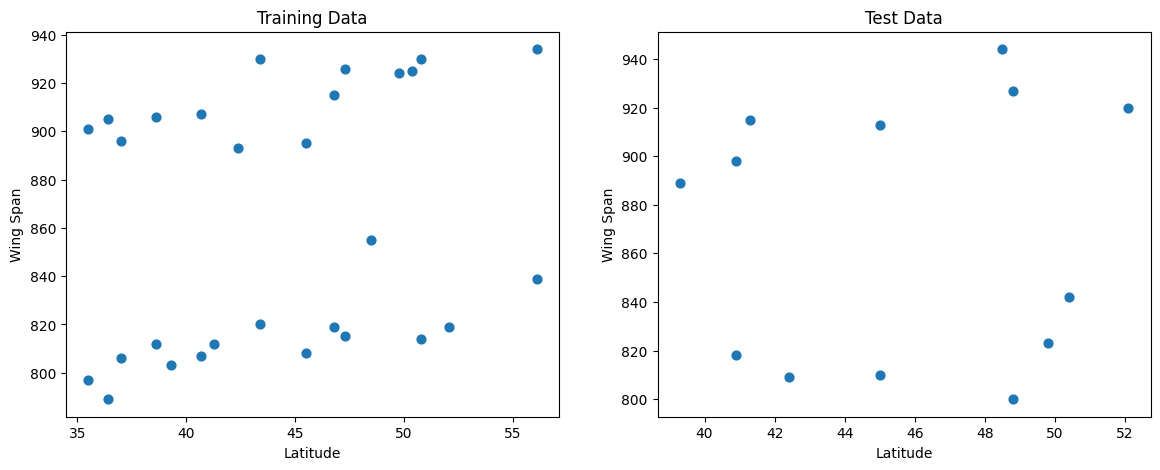

In [4]:
# Plot the training and test data
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(X_train[['latitude']], y_train, s=40)
axs[0].set_title("Training Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Wing Span")


axs[1].scatter(X_test[['latitude']], y_test, s=40)
axs[1].set_title("Test Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Wing Span")

#### Step 5: Instantiate a Neural Network Object And Configure The Layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [5]:
model = keras.Sequential([
    layers.Input(shape=(3,)),        # Input layer
    layers.Dense(3, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)   # Output layer with a single neuron (for regression)
])

In [6]:
model.compile(optimizer='adam', loss='MeanAbsoluteError')

#### Step 6: Fit The Model

Fitting (Training) the neural network model requires the following steps:

1. Fit the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


In [10]:
# You can adjust the number of epochs and batch size based on your data and resources.
model.fit(X_train, y_train, epochs=200, batch_size=4, validation_data=(X_test, y_test))

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 273.0407 - val_loss: 275.1136
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 278.7691 - val_loss: 269.6714
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 286.3772 - val_loss: 264.2960
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 260.6974 - val_loss: 258.8009
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 259.5837 - val_loss: 253.2905
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 276.8434 - val_loss: 247.8155
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 273.2320 - val_loss: 242.3184
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 234.3249 - val_loss: 236.6795
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 229.9623 - val_loss: 231.1015
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 240.5696 - val_loss: 225.4574
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 254.6180 - val_loss: 219.7877
Epoch 12/200
8/8 ━━━━━━━━━━━━━

> [!Important]
> You may need to re-run the fit a few times

#### Step 7: Evaluate The Model

In [8]:

model_loss = model.evaluate(X_test, y_test)
print(f"Model Loss: {model_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 280.5801
Model Loss: 280.5801


### Step 8: Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [11]:
#Predict the target for a new data point
new_insect = pd.DataFrame({
    'continent': [1],
    'latitude': [40],
    'sex': [0]
})

new_insect['wingsize'] = model.predict(new_insect)
print(f"New insect is:\n{new_insect}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
New insect is:
   continent  latitude  sex    wingsize
0          1        40    0  783.013184


#### Step 9: Plot the Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


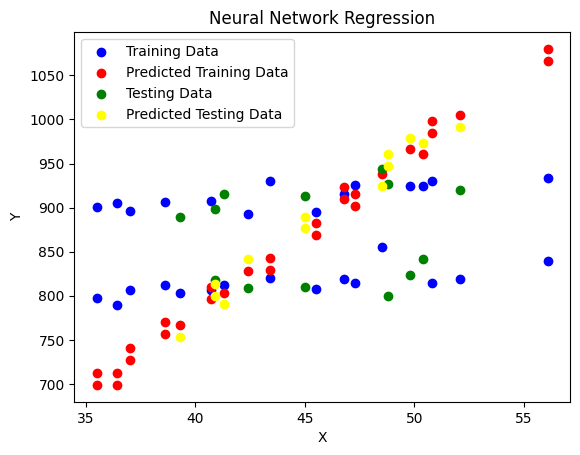

In [12]:
# Plot the actual data and model predictions
plt.scatter(X_train[['latitude']], y_train, label='Training Data', color='blue')
plt.scatter(X_train[['latitude']], model.predict(X_train), label='Predicted Training Data', color='red')
plt.scatter(X_test[['latitude']], y_test, label='Testing Data', color='green')
plt.scatter(X_test[['latitude']], model.predict(X_test), label='Predicted Testing Data', color='yellow')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network Regression')
plt.show()

#### Step 9: Evaluate The Model

In [ ]:
predictions = model.predict(X_train).flatten()
table = pd.DataFrame({
    'Target': y_train,
    'Predicted result': predictions,
    'Loss': y_train - predictions
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost:.5f}")